In [13]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
def connect():
  connection = mysql.connector.connect(
    host = "localhost",
    user = "root",
    password = "",
    database = "wp-ecommerce"
  )

  cursor = connection.cursor(dictionary = True)

  return connection, cursor

In [15]:
def get_users_profiles():
  _, cursor = connect()

  sql = "SELECT ID FROM wp_users"

  cursor.execute(sql)

  users = cursor.fetchall()

  entries = []

  for user in users:
    user_id = user["ID"]

    # get user's country
    sql = '''
      SELECT meta_value FROM wp_usermeta WHERE user_id = (%s) and meta_key = 'country'
    '''

    cursor.execute(sql, (user_id, ))
    result = cursor.fetchone()
    country = result["meta_value"] if result else "unknown"

    # get user's age
    sql = '''
      SELECT meta_value FROM wp_usermeta WHERE user_id = (%s) and meta_key = 'age'
    '''
    
    cursor.execute(sql, (user_id, ))
    result = cursor.fetchone()
    age = result["meta_value"] if result else "unknown"

    # get user's gender
    sql = '''
      SELECT meta_value FROM wp_usermeta WHERE user_id = (%s) and meta_key = 'gender'
    '''
    
    cursor.execute(sql, (user_id, ))
    result = cursor.fetchone()
    gender = result["meta_value"] if result else "unknown"

    entries.append({
      "user_id": user_id,
      "country": country,
      "age": age,
      "gender": gender,
    })
  
  data = pd.DataFrame(entries)

  data.drop(data[data["country"] == "unknown"].index)
  data.drop(data[data["age"] == "unknown"].index)
  data.drop(data[data["gender"] == "unknown"].index)

  data["age"] = pd.to_numeric(data["age"])

  return data

In [16]:
data = get_users_profiles()

data

,user_id,country,age,gender
0,1501,JO,33,ذكر
1,1784,JO,30,ذكر
2,1109,AE,37,انثى
3,112,BH,55,انثى
4,1115,JO,29,ذكر
...,...,...,...,...
1497,892,AE,30,انثى
1498,91,SA,41,ذكر
1499,910,BH,44,انثى
1500,931,SA,48,انثى


In [17]:
def show_users_by_age_hist():
  age = data["age"]
  age.hist(bins = [0, 10, 20, 30, 40, 50, 60, 70, 80])

  plt.title("User Age Histogram")
  plt.xlabel("Age")
  plt.ylabel("Count")

  plt.show()

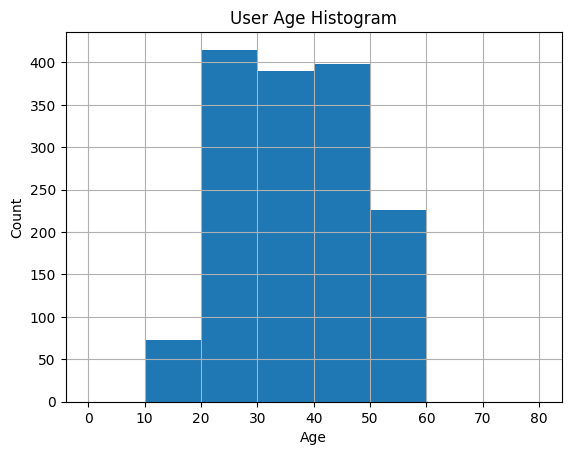

In [18]:
show_users_by_age_hist()

In [19]:
def show_users_by_age_density():
  age = data["age"]
  age.plot(kind = "density")

  plt.title("User Age Density")
  plt.xlabel("Age")
  plt.ylabel("Density")

  plt.show()

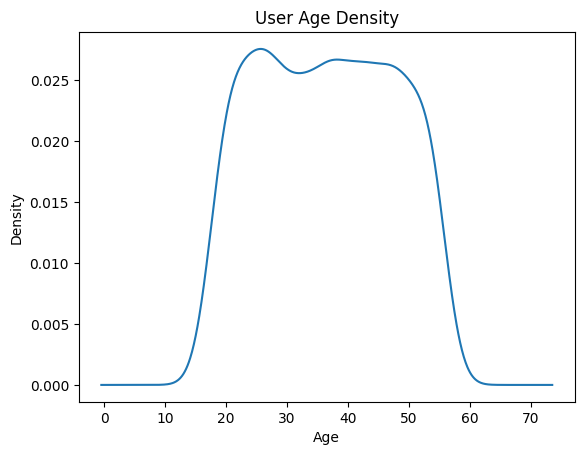

In [20]:
show_users_by_age_density()

In [21]:
import arabic_reshaper
from bidi.algorithm import get_display

def show_users_by_gender_pie():
  gender_data = data[["user_id", "gender"]].groupby("gender").count()

  gender_data = gender_data.reset_index()

  gender_data["gender"] = gender_data["gender"].apply(lambda x: get_display(arabic_reshaper.reshape(x)))

  plt.pie(gender_data["user_id"], labels = gender_data["gender"], autopct = "%1.1f%%")

  plt.title("Users Gender")

  plt.show()

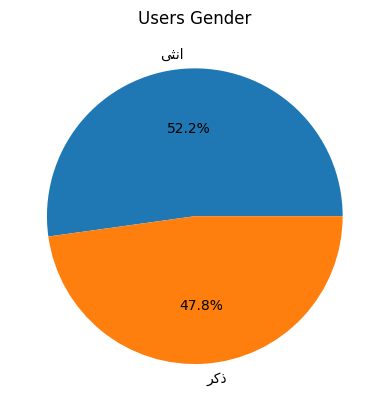

In [22]:
show_users_by_gender_pie()

In [23]:
def show_users_by_gender_countplot():
  gender_data = data["gender"]
  gender_data = gender_data.apply(lambda x: get_display(arabic_reshaper.reshape(x)))

  plt.subplots(figsize = (8, 6))
  plt.title("Users Gender")

  axis = sns.countplot(x = gender_data)
  axis.bar_label(axis.containers[0])

  plt.show()

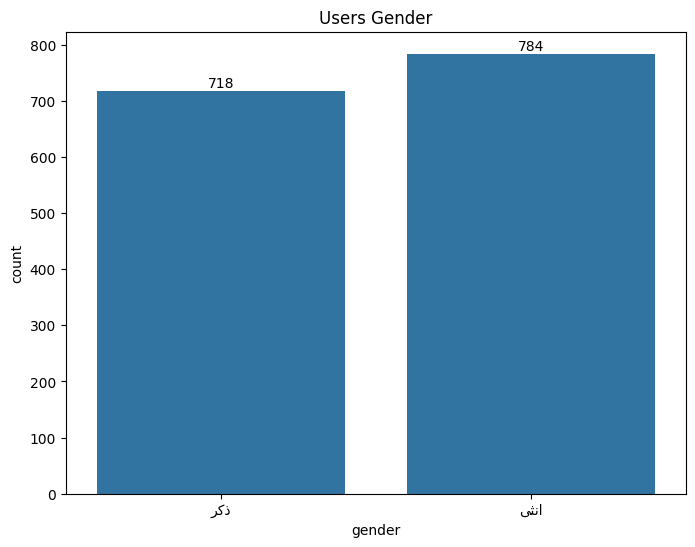

In [24]:
show_users_by_gender_countplot()